## GoGreen increases participation in future Marketing campaigns with Machine Learning

## Executive summary


### Background

GoGreen is a company in the solar industry.  It needs help with two tasks:

- ##### Data Analysis: 

The goal is to answer questions that will help GoGreen go ahead of competitors using these answers for strategical planning and decision making.  In this part, I am only looking at what happened in the past, creating visualizations, making recommendations and providing insights. 

    - What does the Average customer look like for our company? 
    - Which Marketing Campaigns were most successful?
 
- ##### Data Analytics: 

The goal is to make predictions and know what the result would be by taking a certain action.  For example, given client attributes, I can predict who will respond to a future marketing campaign.  This way, GoGreen can optimize resources and save millions in Marketing budget.

    - Which factors contribute to the success of future marketing campaigns?.


### Overview of Approach

- ##### Data Analysis: 

I present the results in a report with recommendations and next steps. Based on this report, clear and well-founded decisions can be made, costs can be saved and processes optimized.

- ##### Data Analytics:

Using statistics, Python programming and machine learning techniques, I can find patterns in the data and make an algorithm which can be used to predict a client response to a campaign.


#### Data Dictionary

The following are the fields that we have in our data:


- `ID`: the unique identification code for every customer
- `Year_Birth`: The Year of a customer's birth
- `Education`: The level of education that a customer completed
- `Marital_Status`: Status of Marriage
- `Income`: Annual Income
- `Kidhome`: # of children under the age of 13 in Customer's household
- `Teenhome`: # of children between 13-19 in Customer's household
- `Dt_Customer`: Date of Customer Enrollment
- `Recency`: # of days since last purchase
- `MntWines`: Dollar amount of Wines purchased in last 2 years
- `MntFruits`: Dollar amount of Fruits purchased in last 2 years
- `MntMeatProducts`: Dollar amount of Meat products purchased in the last 2 years
- `MntFishProducts`: Dollar amount of Fish products purchased in the last 2 years
- `MntSweetProducts`: Dollar amount of Sweet products purchased in the last 2 years
- `MntGoldProds`: Dollar amount of Gold products purchased in the last 2 years
- `NumDealsPurchases`: # of purchases made with discount
- `NumWebPurchases`: # of purchases made through the company's website
- `NumCatalogPurchases`: # of purchases made using the catalog
- `NumStorePurchases`: # of purchases made directly in-store
- `NumWebVisitsMonth`: # of visits made through company's website
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Complain`: 1 if customer complained in the last 2 years, 0 otherwise
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise


## Let's start coding!

### Import Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

In [2]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [4]:
# To supress numerical display in scientific notations
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [5]:
# Avoid displaying warnings
import warnings

In [6]:
# Machine Learning Libraries



In [7]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

In [8]:
# loading the dataset
df = pd.read_excel("marketing_campaign.xlsx")

<IPython.core.display.Javascript object>

In [9]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

There are 2240 rows and 27 columns in the dataset


<IPython.core.display.Javascript object>

In [10]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [11]:
# to view last 5 rows of the dataset
df.tail(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2238,8235,1956,Master,Together,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.00,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [12]:
# let's create a copy of the data to avoid any changes to original data
data = df.copy()

<IPython.core.display.Javascript object>

In [13]:
# checking for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values in the data.

In [14]:
# checking the names of the columns in the data
print(data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


<IPython.core.display.Javascript object>

In [15]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<IPython.core.display.Javascript object>

* Dependent variable is the `Response` of a client to a campaign, which is of *int* type but needs to be converted into *categorical* .

* `Education`, `Marital_Status`, `Dt_Customer` are of *object* type.

* All other columns are numeric in nature.

* There are 24 missing values in the `income` column.

### Fixing the data types
* `Year_Birth` should be converted in a categorical data type by dividing the column in generations. EX. Millenials, Baby Boomers, GenZ. 

In [16]:
conditions = [
    (df["Year_Birth"] >= 1893) & (df["Year_Birth"] <= 1923),
    (df["Year_Birth"] >= 1924) & (df["Year_Birth"] <= 1945),
    (df["Year_Birth"] >= 1946) & (df["Year_Birth"] <= 1964),
    (df["Year_Birth"] >= 1965) & (df["Year_Birth"] <= 1980),
    (df["Year_Birth"] >= 1981) & (df["Year_Birth"] <= 1996),
    (df["Year_Birth"] >= 1997) & (df["Year_Birth"] <= 2012),
    (df["Year_Birth"] >= 2013) & (df["Year_Birth"] <= 2025),
]

values = [
    "Error",
    "96-100 years old - Silent",
    "59-95 - Boomer",
    "43-58 - GenX",
    "27-57 - Millenialls",
    "11-26 GenZ",
    "0-10 - GenA",
]

<IPython.core.display.Javascript object>

- Create new column `age_group`

In [17]:
data["age_group"] = np.select(conditions, values)

<IPython.core.display.Javascript object>

- Let's drop `Year_Birth` from our dataset

In [18]:
data.drop(columns=["Year_Birth"], inplace=True)

<IPython.core.display.Javascript object>

In [19]:
data.head(2)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age_group
0,5524,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,59-95 - Boomer
1,2174,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,59-95 - Boomer


<IPython.core.display.Javascript object>

* `Dt_Customer` should be converted in a categorical data type.
*  Let's create a new column extracting the year from `Dt_Customer`

In [20]:
data["date_customer"] = data["Dt_Customer"].str[:4]

<IPython.core.display.Javascript object>

In [21]:
data.head(2)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age_group,date_customer
0,5524,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,59-95 - Boomer,2012
1,2174,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,59-95 - Boomer,2014


<IPython.core.display.Javascript object>

- We do not need `ID` and `Dt_Customer` columns.  Let's drop them

In [22]:
data.drop(columns=["Dt_Customer", "ID"], inplace=True)

<IPython.core.display.Javascript object>

In [23]:
data.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age_group,date_customer
0,Graduation,Single,58138.00,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,59-95 - Boomer,2012
1,Graduation,Single,46344.00,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,59-95 - Boomer,2014


<IPython.core.display.Javascript object>

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

<IPython.core.display.Javascript object>

* `Education`,`Marital_Status`, `age_group`, `date_customer` are of object type, we can change them to categories.

* `Recency`, `Kidhome`, `Teenhome`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`, `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`,`AcceptedCmp5`, `Complain`, `Response` are numerical but we can convert them to "category" as well.

* *Coverting *objects* to *category* reduces the data space required to store the dataframe*

In [25]:
data["Education"] = data["Education"].astype("category")
data["Marital_Status"] = data["Marital_Status"].astype("category")
data["age_group"] = data["age_group"].astype("category")
data["date_customer"] = data["date_customer"].astype("category")
data["Kidhome"] = data["Kidhome"].astype("category")
data["Teenhome"] = data["Teenhome"].astype("category")
data["NumDealsPurchases"] = data["NumDealsPurchases"].astype("category")
data["NumWebPurchases"] = data["NumWebPurchases"].astype("category")
data["NumCatalogPurchases"] = data["NumCatalogPurchases"].astype("category")
data["NumStorePurchases"] = data["NumStorePurchases"].astype("category")
data["NumWebVisitsMonth"] = data["NumWebVisitsMonth"].astype("category")
data["AcceptedCmp1"] = data["AcceptedCmp1"].astype("category")
data["AcceptedCmp2"] = data["AcceptedCmp2"].astype("category")
data["AcceptedCmp3"] = data["AcceptedCmp3"].astype("category")
data["AcceptedCmp4"] = data["AcceptedCmp4"].astype("category")
data["AcceptedCmp5"] = data["AcceptedCmp5"].astype("category")
# data["Recency"] = data["Recency"].astype("category")
data["Complain"] = data["Complain"].astype("category")
data["Response"] = data["Response"].astype("category")
data["date_customer"] = data["date_customer"].astype("category")

<IPython.core.display.Javascript object>

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2240 non-null   category
 1   Marital_Status       2240 non-null   category
 2   Income               2216 non-null   float64 
 3   Kidhome              2240 non-null   category
 4   Teenhome             2240 non-null   category
 5   Recency              2240 non-null   int64   
 6   MntWines             2240 non-null   int64   
 7   MntFruits            2240 non-null   int64   
 8   MntMeatProducts      2240 non-null   int64   
 9   MntFishProducts      2240 non-null   int64   
 10  MntSweetProducts     2240 non-null   int64   
 11  MntGoldProds         2240 non-null   int64   
 12  NumDealsPurchases    2240 non-null   category
 13  NumWebPurchases      2240 non-null   category
 14  NumCatalogPurchases  2240 non-null   category
 15  NumStorePurchases    

<IPython.core.display.Javascript object>

* we can see that the memory usage has decreased from 455.1 KB to 175.4 KB

### Checking for missing values in the data

In [27]:
data.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
age_group               0
date_customer           0
dtype: int64

<IPython.core.display.Javascript object>

* `income` column has 24 missing values. It represents 1% of total data in the column.
* No other column has missing values.
* We will drop the missing values in the dataset because this data is not possible to obtain for the current analysis

In [28]:
data.dropna(inplace=True)
data.shape

(2216, 26)

<IPython.core.display.Javascript object>

In [29]:
# Let's look at the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.00,52247.25,25173.08,1730.00,35303.00,51381.50,68522.00,666666.00
Recency,2216.00,49.01,28.95,0.00,24.00,49.00,74.00,99.00
MntWines,2216.00,305.09,337.33,0.00,24.00,174.50,505.00,1493.00
MntFruits,2216.00,26.36,39.79,0.00,2.00,8.00,33.00,199.00
MntMeatProducts,2216.00,167.00,224.28,0.00,16.00,68.00,232.25,1725.00
MntFishProducts,2216.00,37.64,54.75,0.00,3.00,12.00,50.00,259.00
MntSweetProducts,2216.00,27.03,41.07,0.00,1.00,8.00,33.00,262.00
MntGoldProds,2216.00,43.97,51.82,0.00,9.00,24.50,56.00,321.00


<IPython.core.display.Javascript object>

### Observations of numerical columns

* We have 2,240 clients


* At least 50% of our clients have not purchased in the last 49 days. The data is spread across the data range evenly.


* Median `income` sits below 51,381. At least 75% of clients make less than 68.5k a year.


* The product category that our clients invest the greatest dollar amoount is wines.  The median wine spend is 173 dollars.  It is recommended to use the *median* instead of the *mean* for having outliers.


* The second best product category in dollar amoount is Meat.  50% of our clients have spent 67 or less in meat.

### Let's look at the non-numeric columns

In [30]:
# filtering non-numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'age_group', 'date_customer'],
      dtype='object')

<IPython.core.display.Javascript object>

In [31]:
# printing the number of occurrences of each unique value in each categorical column
for column in cat_columns:

    print("Value Counts")
    print(data[column].value_counts())
    print("Percentage (%)")
    print(data[column].value_counts() / len(data) * 100)
    print("-" * 50)

Value Counts
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
Percentage (%)
Graduation   50.36
PhD          21.71
Master       16.47
2n Cycle      9.03
Basic         2.44
Name: Education, dtype: float64
--------------------------------------------------
Value Counts
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
Percentage (%)
Married    38.67
Together   25.86
Single     21.25
Divorced   10.47
Widow       3.43
Alone       0.14
YOLO        0.09
Absurd      0.09
Name: Marital_Status, dtype: float64
--------------------------------------------------
Value Counts
0    1283
1     887
2      46
Name: Kidhome, dtype: int64
Percentage (%)
0   57.90
1   40.03
2    2.08
Name: Kidhome, dtype: float64
--------------------------------------------------
Value Counts
0    1147
1    1018
2      51
Name: Teenhome

<IPython.core.display.Javascript object>

### Observations of non-numerical columns

* Our target variable is the `response` which is categorical.  15.03% of clients have responded to the last marketing campaign.


* `Age`: More than 80% of clients are between 43 and 95 years old.  47.88% of clients are GenX (between 43 and 58 years old), 33.8% are baby boomers (59-95 years old).


* `Education`: 50.36% of our clients have Graduation, followed by 21.71% PHD.


* `Marital status`: 38.67% are married, 25.86% Together, 21.25% single.  More than 60% have partners in the household.  Makes sense for the age group.


* `Kidhome`: 57.9% have NO kids, followed by 40.03% have 1 kid.  Makes sense for the age group.


* `Teenhome`: 51.76% have NO teens, followed by 45.94% have 1 Teen. Makes sense for the age group.


* `Numpurchasesdiscounts`: 43% of clients made 1 purchase with discounts, 22.25% of clients made 2 purchases with discounts.


* `Numwebpurchases`: 16.6% of clients made 2 web purchases, followed by 15.7% made 1 web purchase, and 15% made 3 web purchases.


* `NumCatalogpurchases`: 25.99% of clients did not purchase through catalog, 22.2% did 1 catalog purchase, 12.36% of clients did 2 catalog purchases.


* `NumStorePurchases`: At least 55% of clients have purchased between 2 and 5 times in-store.  Only 3.67% have purchased 13 times in-store.


* `NumWebVisitsMonth`: At least 60.5% of clients have visited the website between 5 and 8 times a month.


* `Acceptedoffer` in the 1st, 2nd, 3rd, 4th, 5th campaign: The 2nd campaign is the least effective, whereas the 4th, 5th, 3rd, 2nd campaigns are the most successful in order of importance.

    * 6,41% 1st campaign 
    * 1.35% 2nd campaign 
    * 7.36% 3rd campaign 
    * 7.4% 4th campaign 
    * 7.31% 5th campaign


* Less of 1% of clients `complained` in the last 2 years.


* More than 75% of our clients were aquired in the last two years of data.  More than 52% of clients were aquired in 2013.

### Let's visualize the data

### Univariate Analysis 

In [32]:
# filtering out non-numeric columns
num_columns = data.select_dtypes(include=["int64", "float64"]).columns
num_columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

<IPython.core.display.Javascript object>

In [33]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


######## To activate the function massively

# for col in num_columns:
# histogram_boxplot(data, col)

<IPython.core.display.Javascript object>

#### `Income`

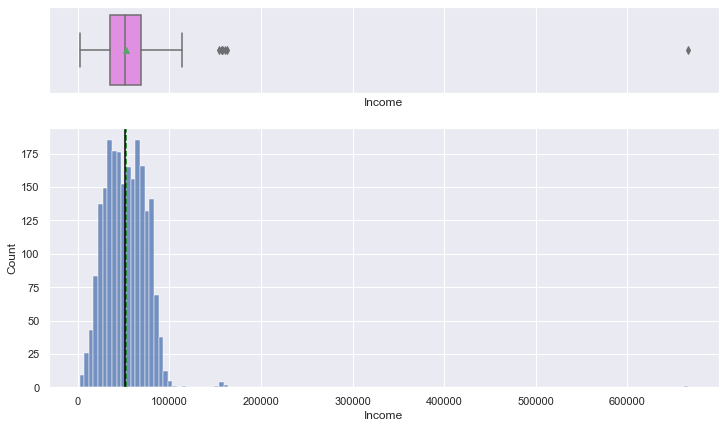

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(data, "Income")

#### `Recency`

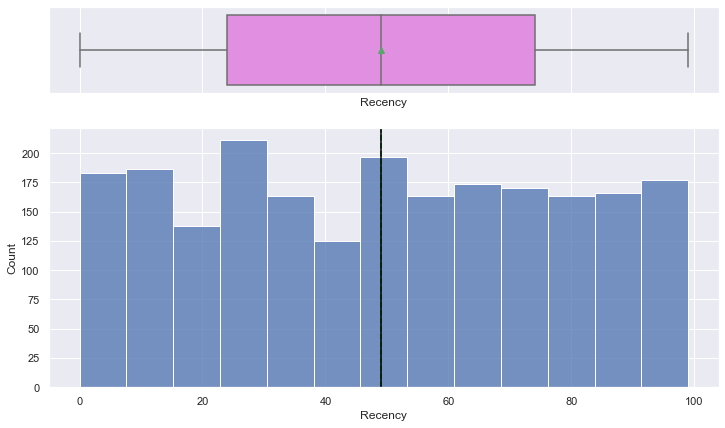

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(data, "Recency")

#### `MntWines`

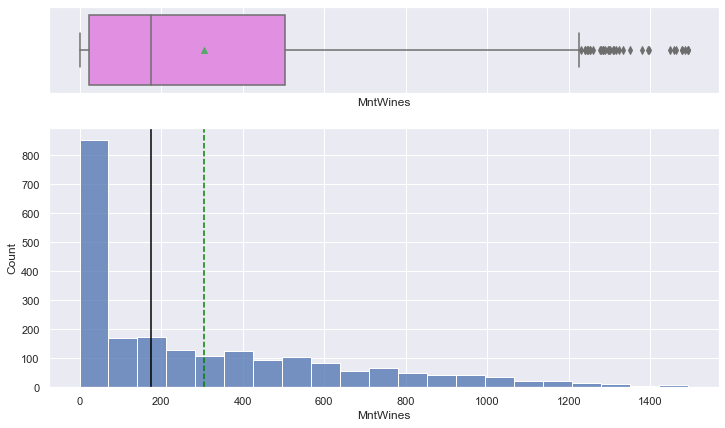

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(data, "MntWines")

#### `MntFruits`

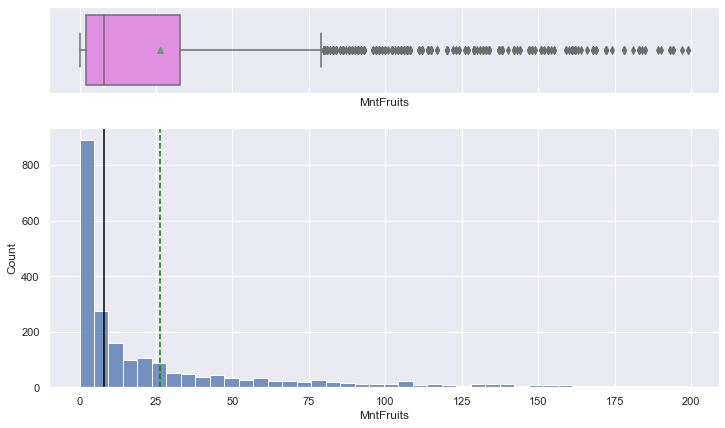

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(data, "MntFruits")

#### `MntMeatProducts`

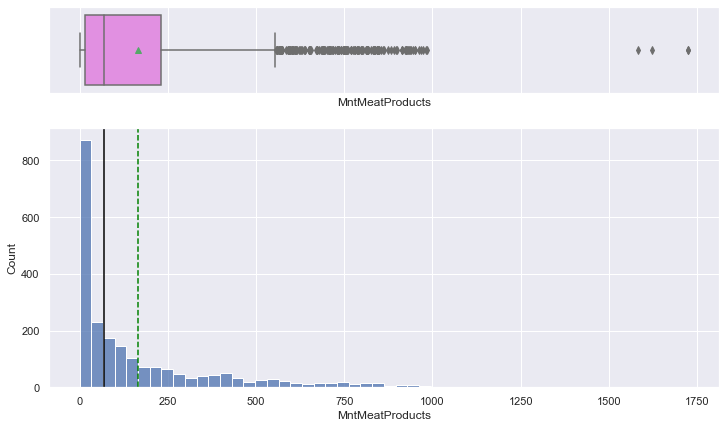

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(data, "MntMeatProducts")

#### `MntFishProducts`

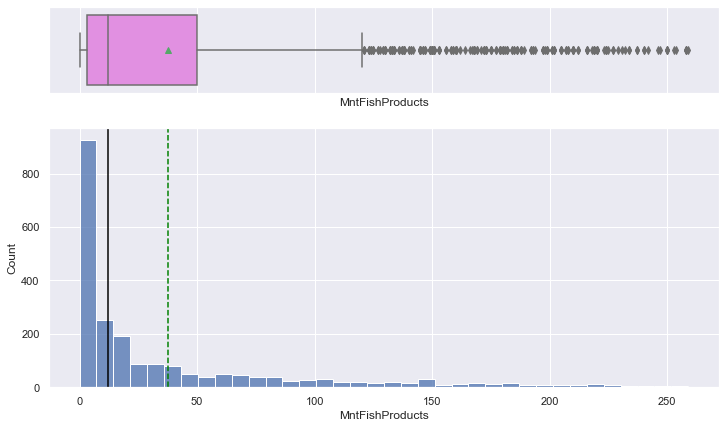

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(data, "MntFishProducts")

#### `MntSweetProducts`

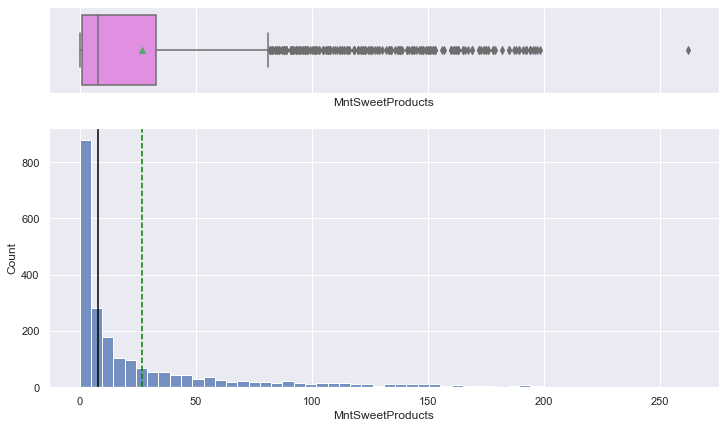

<IPython.core.display.Javascript object>

In [40]:
histogram_boxplot(data, "MntSweetProducts")

#### `MntGoldProds`

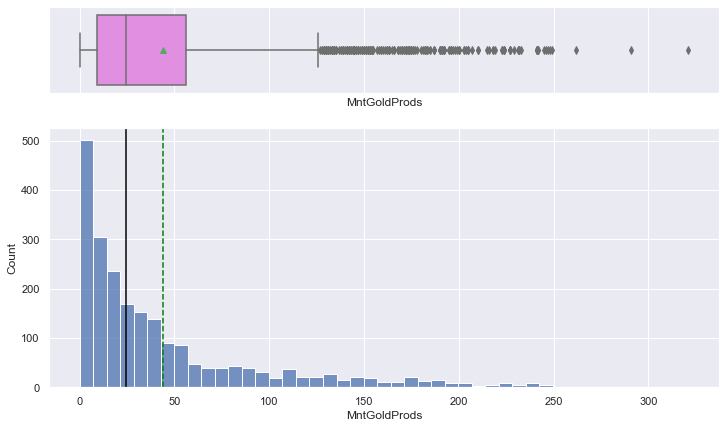

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(data, "MntGoldProds")

#### Categorical Columns

In [42]:
# function to create labeled barplots


def labeled_barplot(
    data,
    feature,
    perc=False,
    n=None,
):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(ascending=False),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [43]:
cat_columns

Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'age_group', 'date_customer'],
      dtype='object')

<IPython.core.display.Javascript object>

#### `Education`:

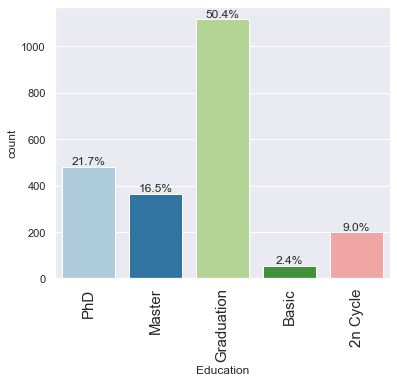

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(data, "Education", perc=True)

#### `Marital_Status`:

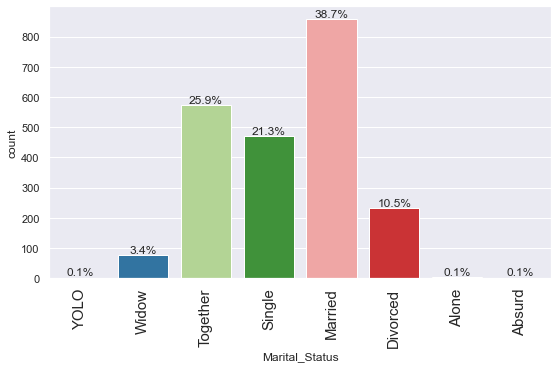

<IPython.core.display.Javascript object>

In [45]:
labeled_barplot(data, "Marital_Status", perc=True)

#### `Kidhome`:

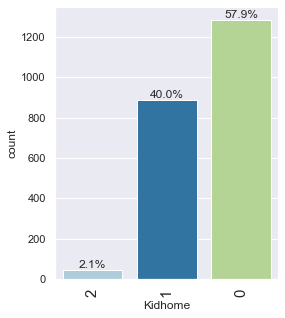

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(data, "Kidhome", perc=True)

#### `Teenhome`:

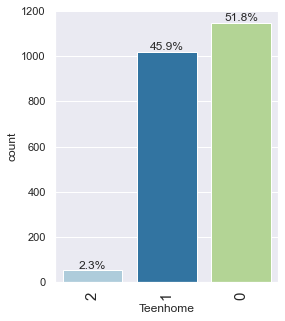

<IPython.core.display.Javascript object>

In [47]:
labeled_barplot(data, "Teenhome", perc=True)

#### `NumDealsPurchases`:

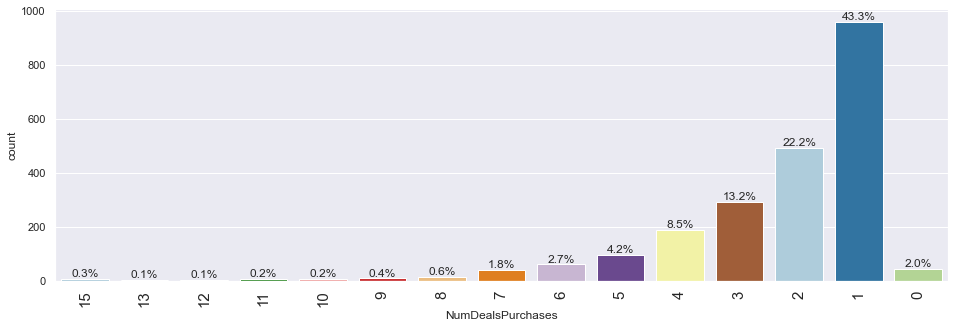

<IPython.core.display.Javascript object>

In [48]:
labeled_barplot(data, "NumDealsPurchases", perc=True)

#### `NumWebPurchases`:

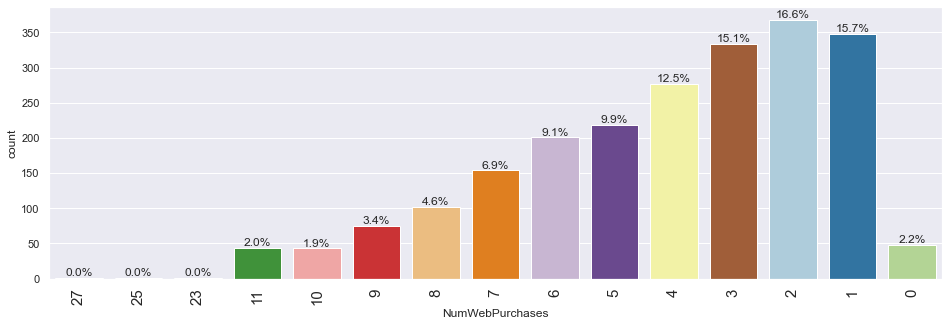

<IPython.core.display.Javascript object>

In [49]:
labeled_barplot(data, "NumWebPurchases", perc=True)

#### `NumCatalogPurchases`:

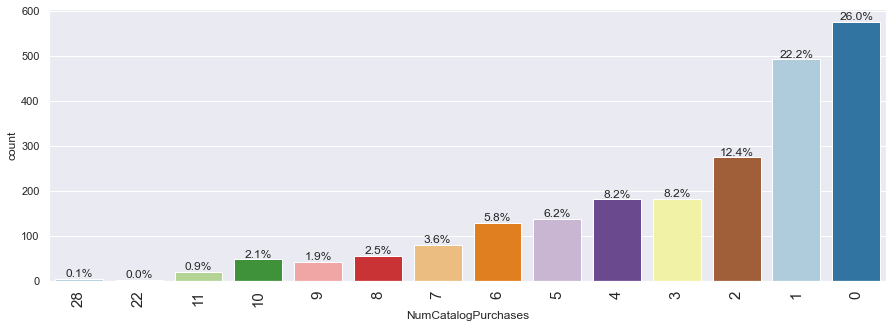

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(data, "NumCatalogPurchases", perc=True)

#### `NumStorePurchases`:

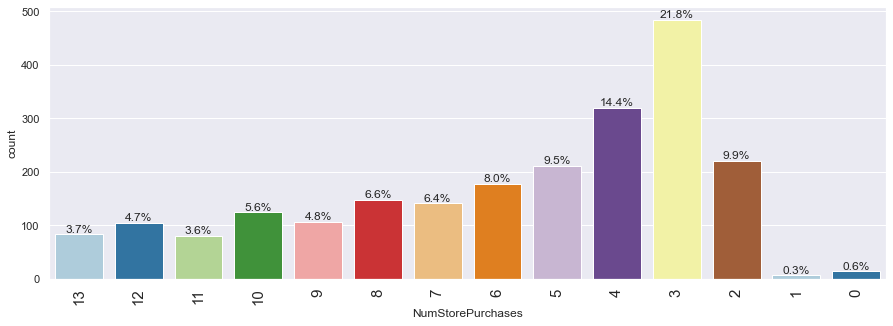

<IPython.core.display.Javascript object>

In [51]:
labeled_barplot(data, "NumStorePurchases", perc=True)

#### `NumWebVisitsMonth`:

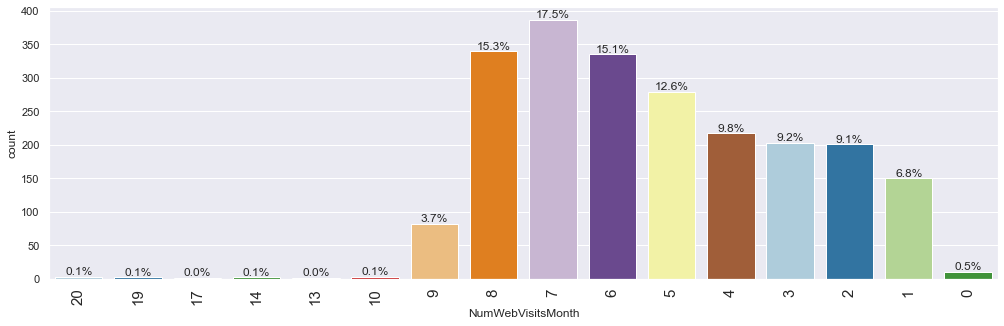

<IPython.core.display.Javascript object>

In [52]:
labeled_barplot(data, "NumWebVisitsMonth", perc=True)

#### `Response`:

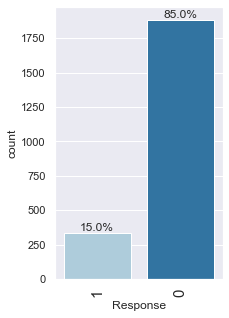

<IPython.core.display.Javascript object>

In [53]:
labeled_barplot(data, "Response", perc=True)

#### `Complain`:

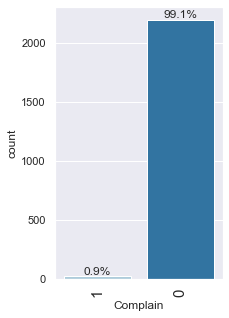

<IPython.core.display.Javascript object>

In [54]:
labeled_barplot(data, "Complain", perc=True)

#### `AcceptedCmp1`:

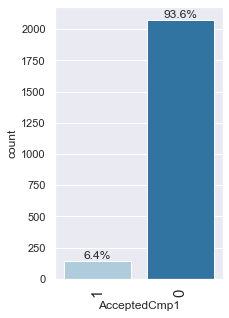

<IPython.core.display.Javascript object>

In [55]:
labeled_barplot(data, "AcceptedCmp1", perc=True)

#### `AcceptedCmp2`:

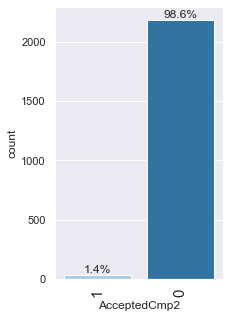

<IPython.core.display.Javascript object>

In [56]:
labeled_barplot(data, "AcceptedCmp2", perc=True)

#### `AcceptedCmp3`:

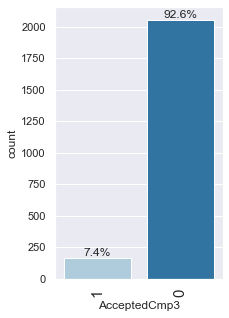

<IPython.core.display.Javascript object>

In [57]:
labeled_barplot(data, "AcceptedCmp3", perc=True)

#### `AcceptedCmp4`:

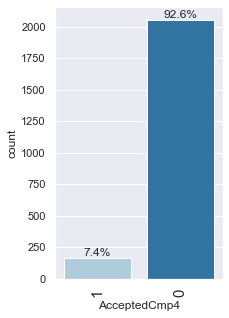

<IPython.core.display.Javascript object>

In [58]:
labeled_barplot(data, "AcceptedCmp4", perc=True)

#### `AcceptedCmp5`:

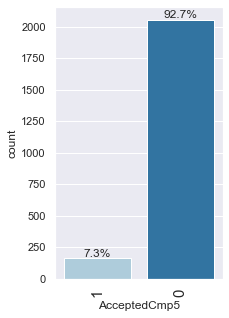

<IPython.core.display.Javascript object>

In [59]:
labeled_barplot(data, "AcceptedCmp5", perc=True)

#### `age_group`:

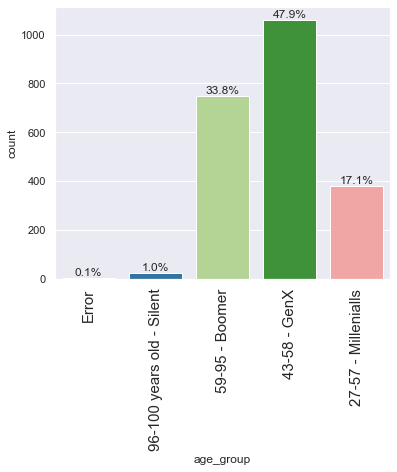

<IPython.core.display.Javascript object>

In [60]:
labeled_barplot(data, "age_group", perc=True)

#### `date_customer`:

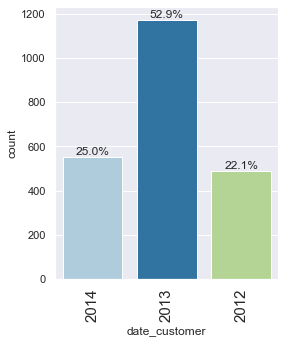

<IPython.core.display.Javascript object>

In [61]:
labeled_barplot(data, "date_customer", perc=True)

### Bivariate analysis

**We will not consider the *categorical* columns for correlation check as they have only 0 or 1 values.**

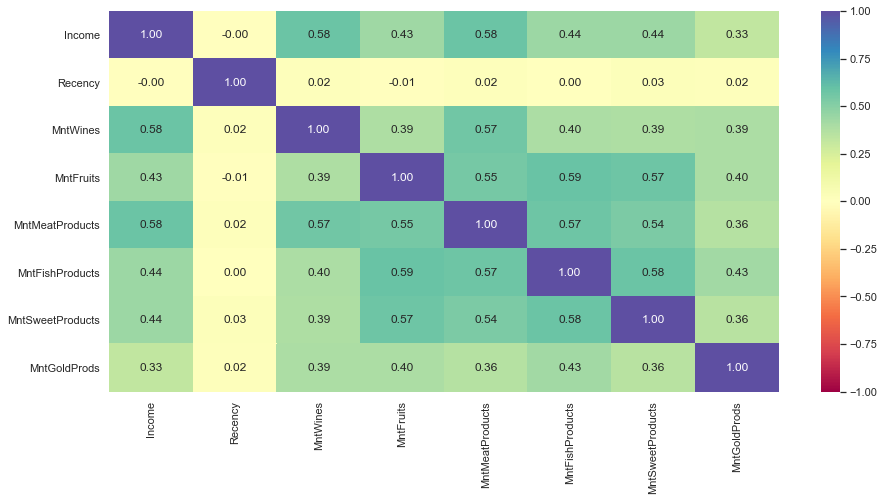

<IPython.core.display.Javascript object>

In [64]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Income,1.00,-0.00,0.58,0.43,0.58,0.44,0.44,0.33
Recency,-0.00,1.00,0.02,-0.01,0.02,0.00,0.03,0.02
MntWines,0.58,0.02,1.00,0.39,0.57,0.40,0.39,0.39
MntFruits,0.43,-0.01,0.39,1.00,0.55,0.59,0.57,0.40
MntMeatProducts,0.58,0.02,0.57,0.55,1.00,0.57,0.54,0.36
MntFishProducts,0.44,0.00,0.40,0.59,0.57,1.00,0.58,0.43
MntSweetProducts,0.44,0.03,0.39,0.57,0.54,0.58,1.00,0.36
MntGoldProds,0.33,0.02,0.39,0.40,0.36,0.43,0.36,1.00


<IPython.core.display.Javascript object>

* `MntWines` and `Income` columns are highly correlated.
* `MntMeatProducts` and `Income` columns are highly correlated.

### Let's check the variation in `Response` with some of the numerical columns in our data

#### `Response` vs `Income`

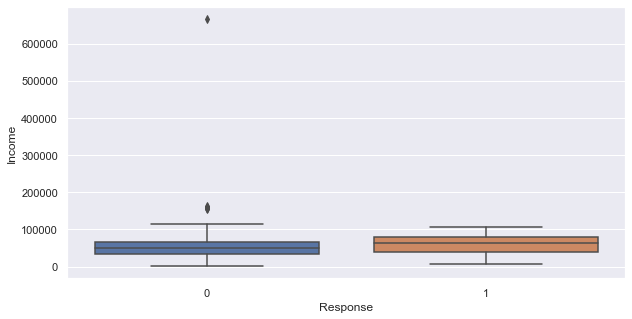

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="Income", data=data)
plt.show()

#### `Response` vs `MntWines`

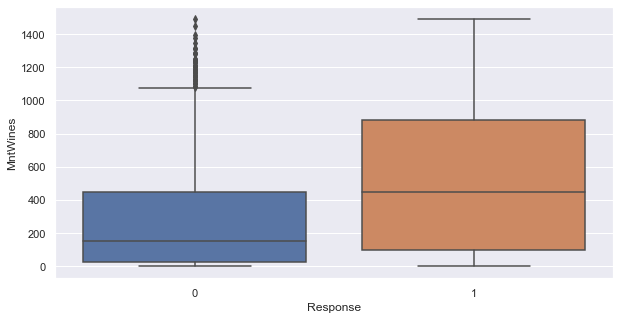

<IPython.core.display.Javascript object>

In [79]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="MntWines", data=data)
plt.show()

#### `Response` vs `MntMeatProducts`

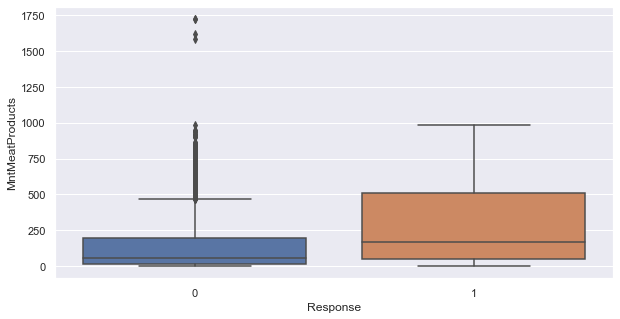

<IPython.core.display.Javascript object>

In [80]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="MntMeatProducts", data=data)
plt.show()

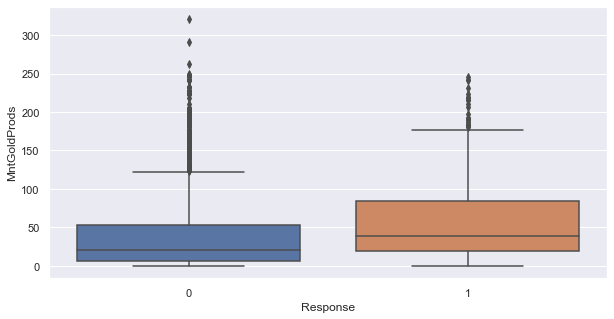

<IPython.core.display.Javascript object>

In [81]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="MntGoldProds", data=data)
plt.show()

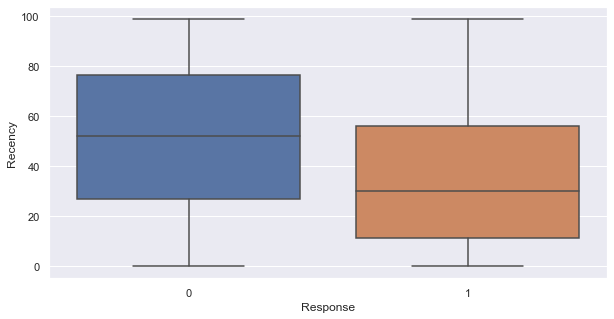

<IPython.core.display.Javascript object>

In [82]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="Recency", data=data)
plt.show()

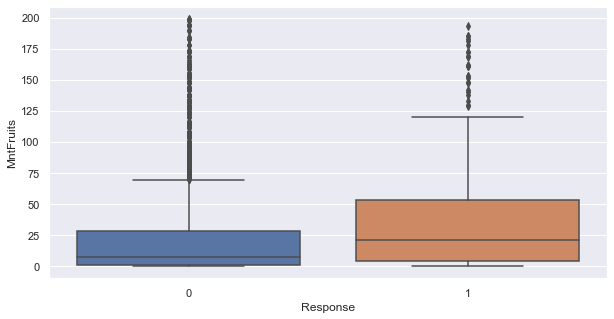

<IPython.core.display.Javascript object>

In [83]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="MntFruits", data=data)
plt.show()

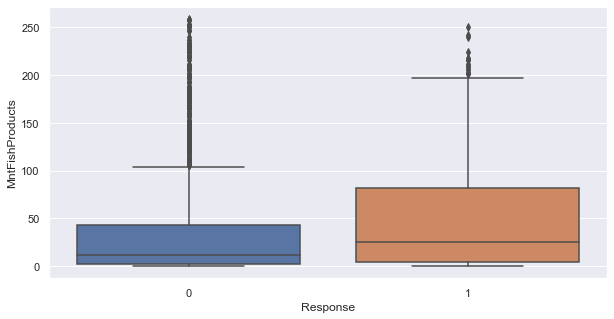

<IPython.core.display.Javascript object>

In [84]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="MntFishProducts", data=data)
plt.show()

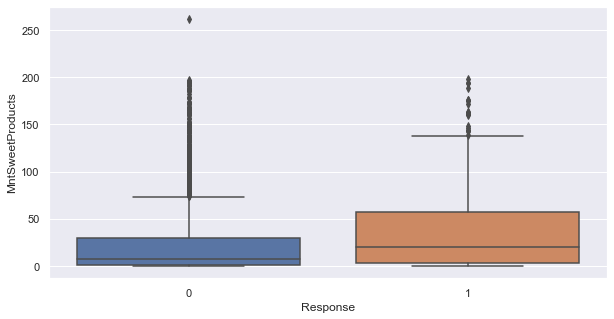

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="MntSweetProducts", data=data)
plt.show()

In [91]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Response       0    1   All
Education                  
All         1883  333  2216
Graduation   964  152  1116
PhD          380  101   481
Master       309   56   365
2n Cycle     178   22   200
Basic         52    2    54
------------------------------------------------------------------------------------------------------------------------


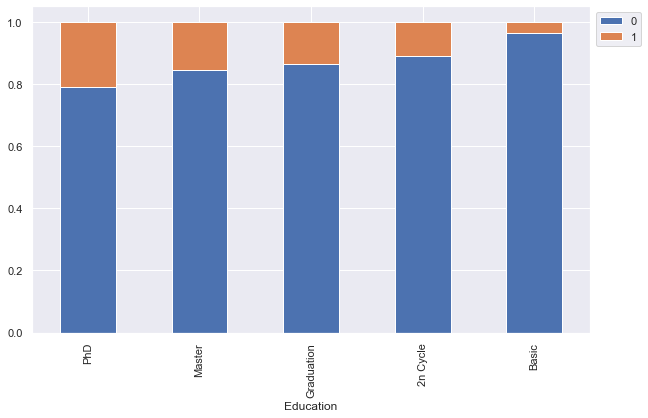

<IPython.core.display.Javascript object>

In [92]:
stacked_barplot(data, "Education", "Response")

Response           0    1   All
Marital_Status                 
All             1883  333  2216
Single           365  106   471
Married          759   98   857
Together         513   60   573
Divorced         184   48   232
Widow             58   18    76
Absurd             1    1     2
Alone              2    1     3
YOLO               1    1     2
------------------------------------------------------------------------------------------------------------------------


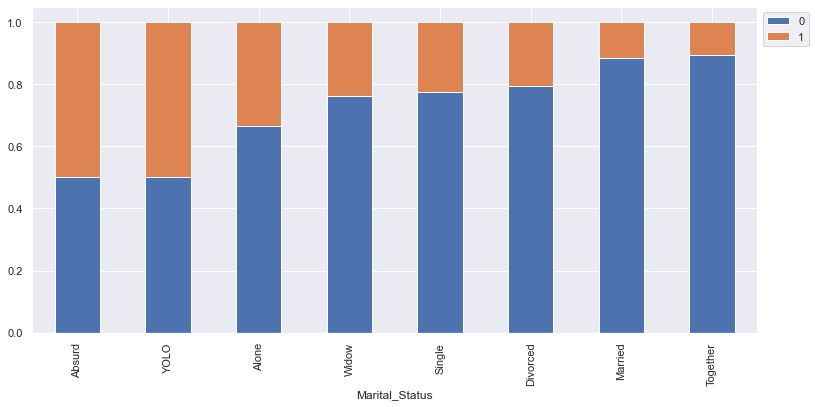

<IPython.core.display.Javascript object>

In [93]:
stacked_barplot(data, "Marital_Status", "Response")

Response     0    1   All
Kidhome                  
All       1883  333  2216
0         1062  221  1283
1          777  110   887
2           44    2    46
------------------------------------------------------------------------------------------------------------------------


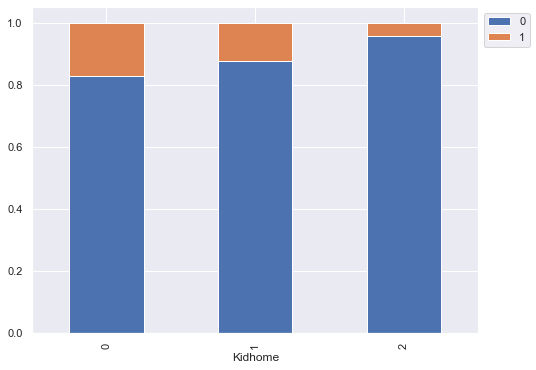

<IPython.core.display.Javascript object>

In [94]:
stacked_barplot(data, "Kidhome", "Response")

Response     0    1   All
Teenhome                 
All       1883  333  2216
0          911  236  1147
1          926   92  1018
2           46    5    51
------------------------------------------------------------------------------------------------------------------------


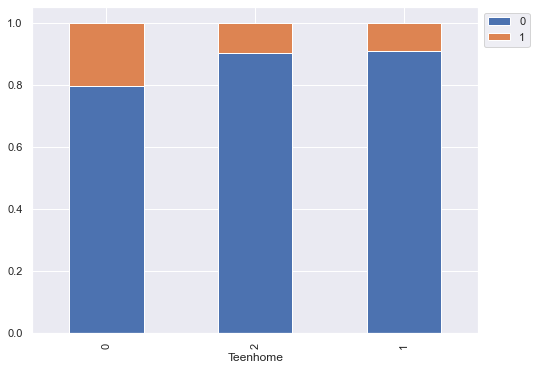

<IPython.core.display.Javascript object>

In [95]:
stacked_barplot(data, "Teenhome", "Response")

Response              0    1   All
NumDealsPurchases                 
All                1883  333  2216
1                   801  159   960
2                   445   48   493
3                   255   38   293
4                   162   26   188
0                    28   16    44
5                    78   16    94
6                    48   12    60
7                    31    8    39
9                     5    3     8
10                    2    3     5
11                    2    3     5
8                    13    1    14
12                    3    0     3
13                    3    0     3
15                    7    0     7
------------------------------------------------------------------------------------------------------------------------


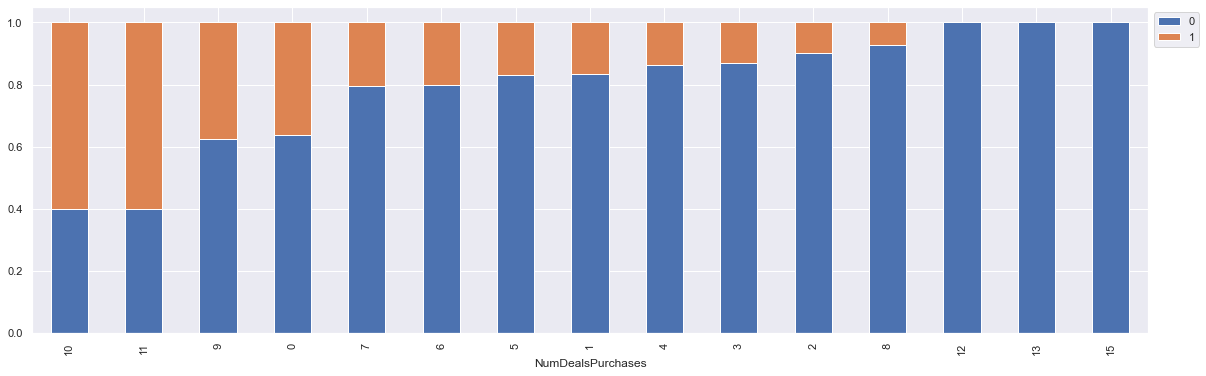

<IPython.core.display.Javascript object>

In [96]:
stacked_barplot(data, "NumDealsPurchases", "Response")

In [65]:
cat_columns

Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'age_group', 'date_customer'],
      dtype='object')

<IPython.core.display.Javascript object>

In [66]:
num_columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

<IPython.core.display.Javascript object>

### <a id='link1'>Summary of EDA</a>

**Data Description:**

- The target variable (`rating`) is of *float* type.
- `title`, `description`, `mediaType`, `sznOfRelease`, and `studio_primary` are of *object* type.
- `ongoing` column is of *bool* type.
- All other columns are numeric in nature.
- The `title` and `description` columns are dropped for modeling as they are highly textual in nature.
- There are no duplicate values in the data.
- There are missing values in the data. The rows with missing data have been dropped.


**Observations from EDA:**

- `rating`: The anime ratings are close to normally distributed, with a mean rating of 2.74. The rating increases with an increase in the number of people who have watched or want to watch the anime.
- `eps`: The distribution is heavily right-skewed as there are many anime movies in the data (at least 50%), and they are considered to be of only one episode as per data description. The number of episodes increases as the anime runs for more years.
- `duration`: The distribution is right-skewed with a median anime runtime of less than 10 minutes. With the increase in rating, the duration increases.
- `years_running`: The distribution is heavily right-skewed, and at least 75% of the anime have run for less than 1 year.
- `watched`: The distribution is heavily right-skewed, and most of the anime have less than 500 viewers. This attribute is highly correlated with the `wantWatch` and `votes` attributes.
- `watching`: The distribution is heavily right-skewed and highly correlated with the `dropped` attribute.
- `wantWatch`: The distribution is heavily right-skewed with a median value of 132 potential watchers.
- `dropped`: The distribution is heavily right-skewed with a drop of 25 viewers on average.
- `votes`: The distribution is heavily right-skewed, and few shows have more than 5000 votes.
- `mediaType`: 23% of the anime are published for TV, 17% as music videos, and 14% as web series. Anime available as TV series, web series, or music videos have a lower rating in general
- `ongoing`: Less than 1% of the anime in the data are ongoing.
- `sznOfRelease`: The season of release is missing for nearly 90% of the anime in the data, and is spread out almost evenly across all seasons when available. Anime ratings have a similar distribution across all the seasons of release.
- `studio_primary`: Nearly 40% of the anime in the data are produced by studios not listed in the data. Toei Animation is the most common studio among the available studio names. In general, the ratings are low for anime produced by DLE studios and studios other than the ones listed in the data.
- `studios_colab`: More than 95% of the anime in the data do not involve collaboration between studios.
- `contentWarn`: Less than 10% of the anime in the data have an associated content warning.
- `tag_<tag/genre>`: There are 1747 anime that are based on manga, 1920 of the Comedy genre, 1238 of the Action genre, 1079 anime of the Romance genre, and more.

## Analysis

## Conclusions

## Recommendations